In [1]:
%pip install tqdm
%pip install pytables


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pytables (from versions: none)
ERROR: No matching distribution found for pytables

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
from pathlib import Path

from tqdm import tqdm 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
nasdaq_path = Path('nasdaq100')
# list(nasdaq_path.iterdir())

In [15]:
tcols = ['openbartime',
         'firsttradetime',
         'highbidtime',
         'highasktime',
         'hightradetime',
         'lowbidtime',
         'lowasktime',
         'lowtradetime',
         'closebartime',
         'lasttradetime']

drop_cols = ['unknowntickvolume',
             'cancelsize',
             'tradeatcrossorlocked']

columns = {'volumeweightprice': 'price',
           'finravolume': 'fvolume',
           'finravolumeweightprice': 'fprice',
           'uptickvolume': 'up',
           'downtickvolume': 'down',
           'repeatuptickvolume': 'rup',
           'repeatdowntickvolume': 'rdown',
           'firsttradeprice': 'first',
           'hightradeprice': 'high',
           'lowtradeprice': 'low',
           'lasttradeprice': 'last',
           'nbboquotecount': 'nbbo',
           'totaltrades': 'ntrades',
           'openbidprice': 'obprice',
           'openbidsize': 'obsize',
           'openaskprice': 'oaprice',
           'openasksize': 'oasize',
           'highbidprice': 'hbprice',
           'highbidsize': 'hbsize',
           'highaskprice': 'haprice',
           'highasksize': 'hasize',
           'lowbidprice': 'lbprice',
           'lowbidsize': 'lbsize',
           'lowaskprice': 'laprice',
           'lowasksize': 'lasize',
           'closebidprice': 'cbprice',
           'closebidsize': 'cbsize',
           'closeaskprice': 'caprice',
           'closeasksize': 'casize',
           'firsttradesize': 'firstsize',
           'hightradesize': 'highsize',
           'lowtradesize': 'lowsize',
           'lasttradesize': 'lastsize',
           'tradetomidvolweight': 'volweight',
           'tradetomidvolweightrelative': 'volweightrel'}

In [16]:
'''
path.glob('*/**/*.csv.gz') is a glob method to find all files with the extension
csv.gz within the specified directory path 
'''

"\npath.glob('*/**/*.csv.gz') is a glob method to find all files with the extension\ncsv.gz within the specified directory path \n"

In [17]:
path = nasdaq_path/ '1min_taq'
if not path.exists():
    path.mkdir(parents=True)
    
data = [] 
    
# read files and create progress bar
for f in tqdm(list(nasdaq_path.glob('*/**/*.csv.gz'))):
    data.append(pd.read_csv(f, parse_dates=[['Date', 'TimeBarStart']])
                    .rename(columns=str.lower)
                    .drop(tcols + drop_cols, axis=1)
                    .rename(columns=columns)
                    .set_index('date_timebarstart')
                    .sort_index()
                    .between_time('9:30', '16:00')
                    .set_index('ticker', append=True)
                    .swaplevel()
                    .rename(columns=lambda x: x.replace('tradeat', 'at')))
    
data = pd.concat(data).apply(pd.to_numeric, downcast='integer')
data.index.rename(['ticker', 'date_time'], inplace=True)
print(data.info(show_counts=True))
data.to_hdf(nasdaq_path / 'algoseek.h5', 'min_taq')


100%|█████████████████████████████████████| 80194/80194 [30:34<00:00, 43.72it/s]


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31355463 entries, ('GMCR', Timestamp('2015-05-14 09:30:00')) to ('HAS', Timestamp('2016-12-28 16:00:00'))
Data columns (total 45 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   obprice        31355451 non-null  float64
 1   obsize         31355451 non-null  float64
 2   oaprice        31355457 non-null  float64
 3   oasize         31355457 non-null  float64
 4   first          30955838 non-null  float64
 5   firstsize      30955838 non-null  float64
 6   hbprice        31355463 non-null  float64
 7   hbsize         31355463 non-null  int32  
 8   haprice        31355463 non-null  float64
 9   hasize         31355463 non-null  int32  
 10  high           30955838 non-null  float64
 11  highsize       30955838 non-null  float64
 12  lbprice        31355463 non-null  float64
 13  lbsize         31355463 non-null  int32  
 14  laprice        31355463 non-null  float64
 15  lasize 

In [18]:
data.info(null_counts = True)

/var/folders/p8/hx0ykfks66ndqhnb_s0q1c140000gn/T/ipykernel_76112/3138777383.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31355463 entries, ('GMCR', Timestamp('2015-05-14 09:30:00')) to ('HAS', Timestamp('2016-12-28 16:00:00'))
Data columns (total 45 columns):
 #   Column         Non-Null Count     Dtype  
---  ------         --------------     -----  
 0   obprice        31355451 non-null  float64
 1   obsize         31355451 non-null  float64
 2   oaprice        31355457 non-null  float64
 3   oasize         31355457 non-null  float64
 4   first          30955838 non-null  float64
 5   firstsize      30955838 non-null  float64
 6   hbprice        31355463 non-null  float64
 7   hbsize         31355463 non-null  int32  
 8   haprice        31355463 non-null  float64
 9   hasize         31355463 non-null  int32  
 10  high           30955838 non-null  float64
 11  highsize       30955838 non-null  float64
 12  lbprice        31355463 non-null  float64
 13  lbsize         31355463 non-null  int32  
 14  laprice        31355463 non-null  float64
 15  lasize 

In [19]:
len(data.index.unique('ticker'))

142

In [20]:
constituents = (data.groupby([data.index.get_level_values('date_time').date, 'ticker'])
                .size()
                .unstack('ticker')
                .notnull()
                .astype(int)
                .replace(0, np.nan))

In [21]:
constituents.index = pd.to_datetime(constituents.index)
constituents = constituents.resample('M').max()
constituents.index = constituents.index.date

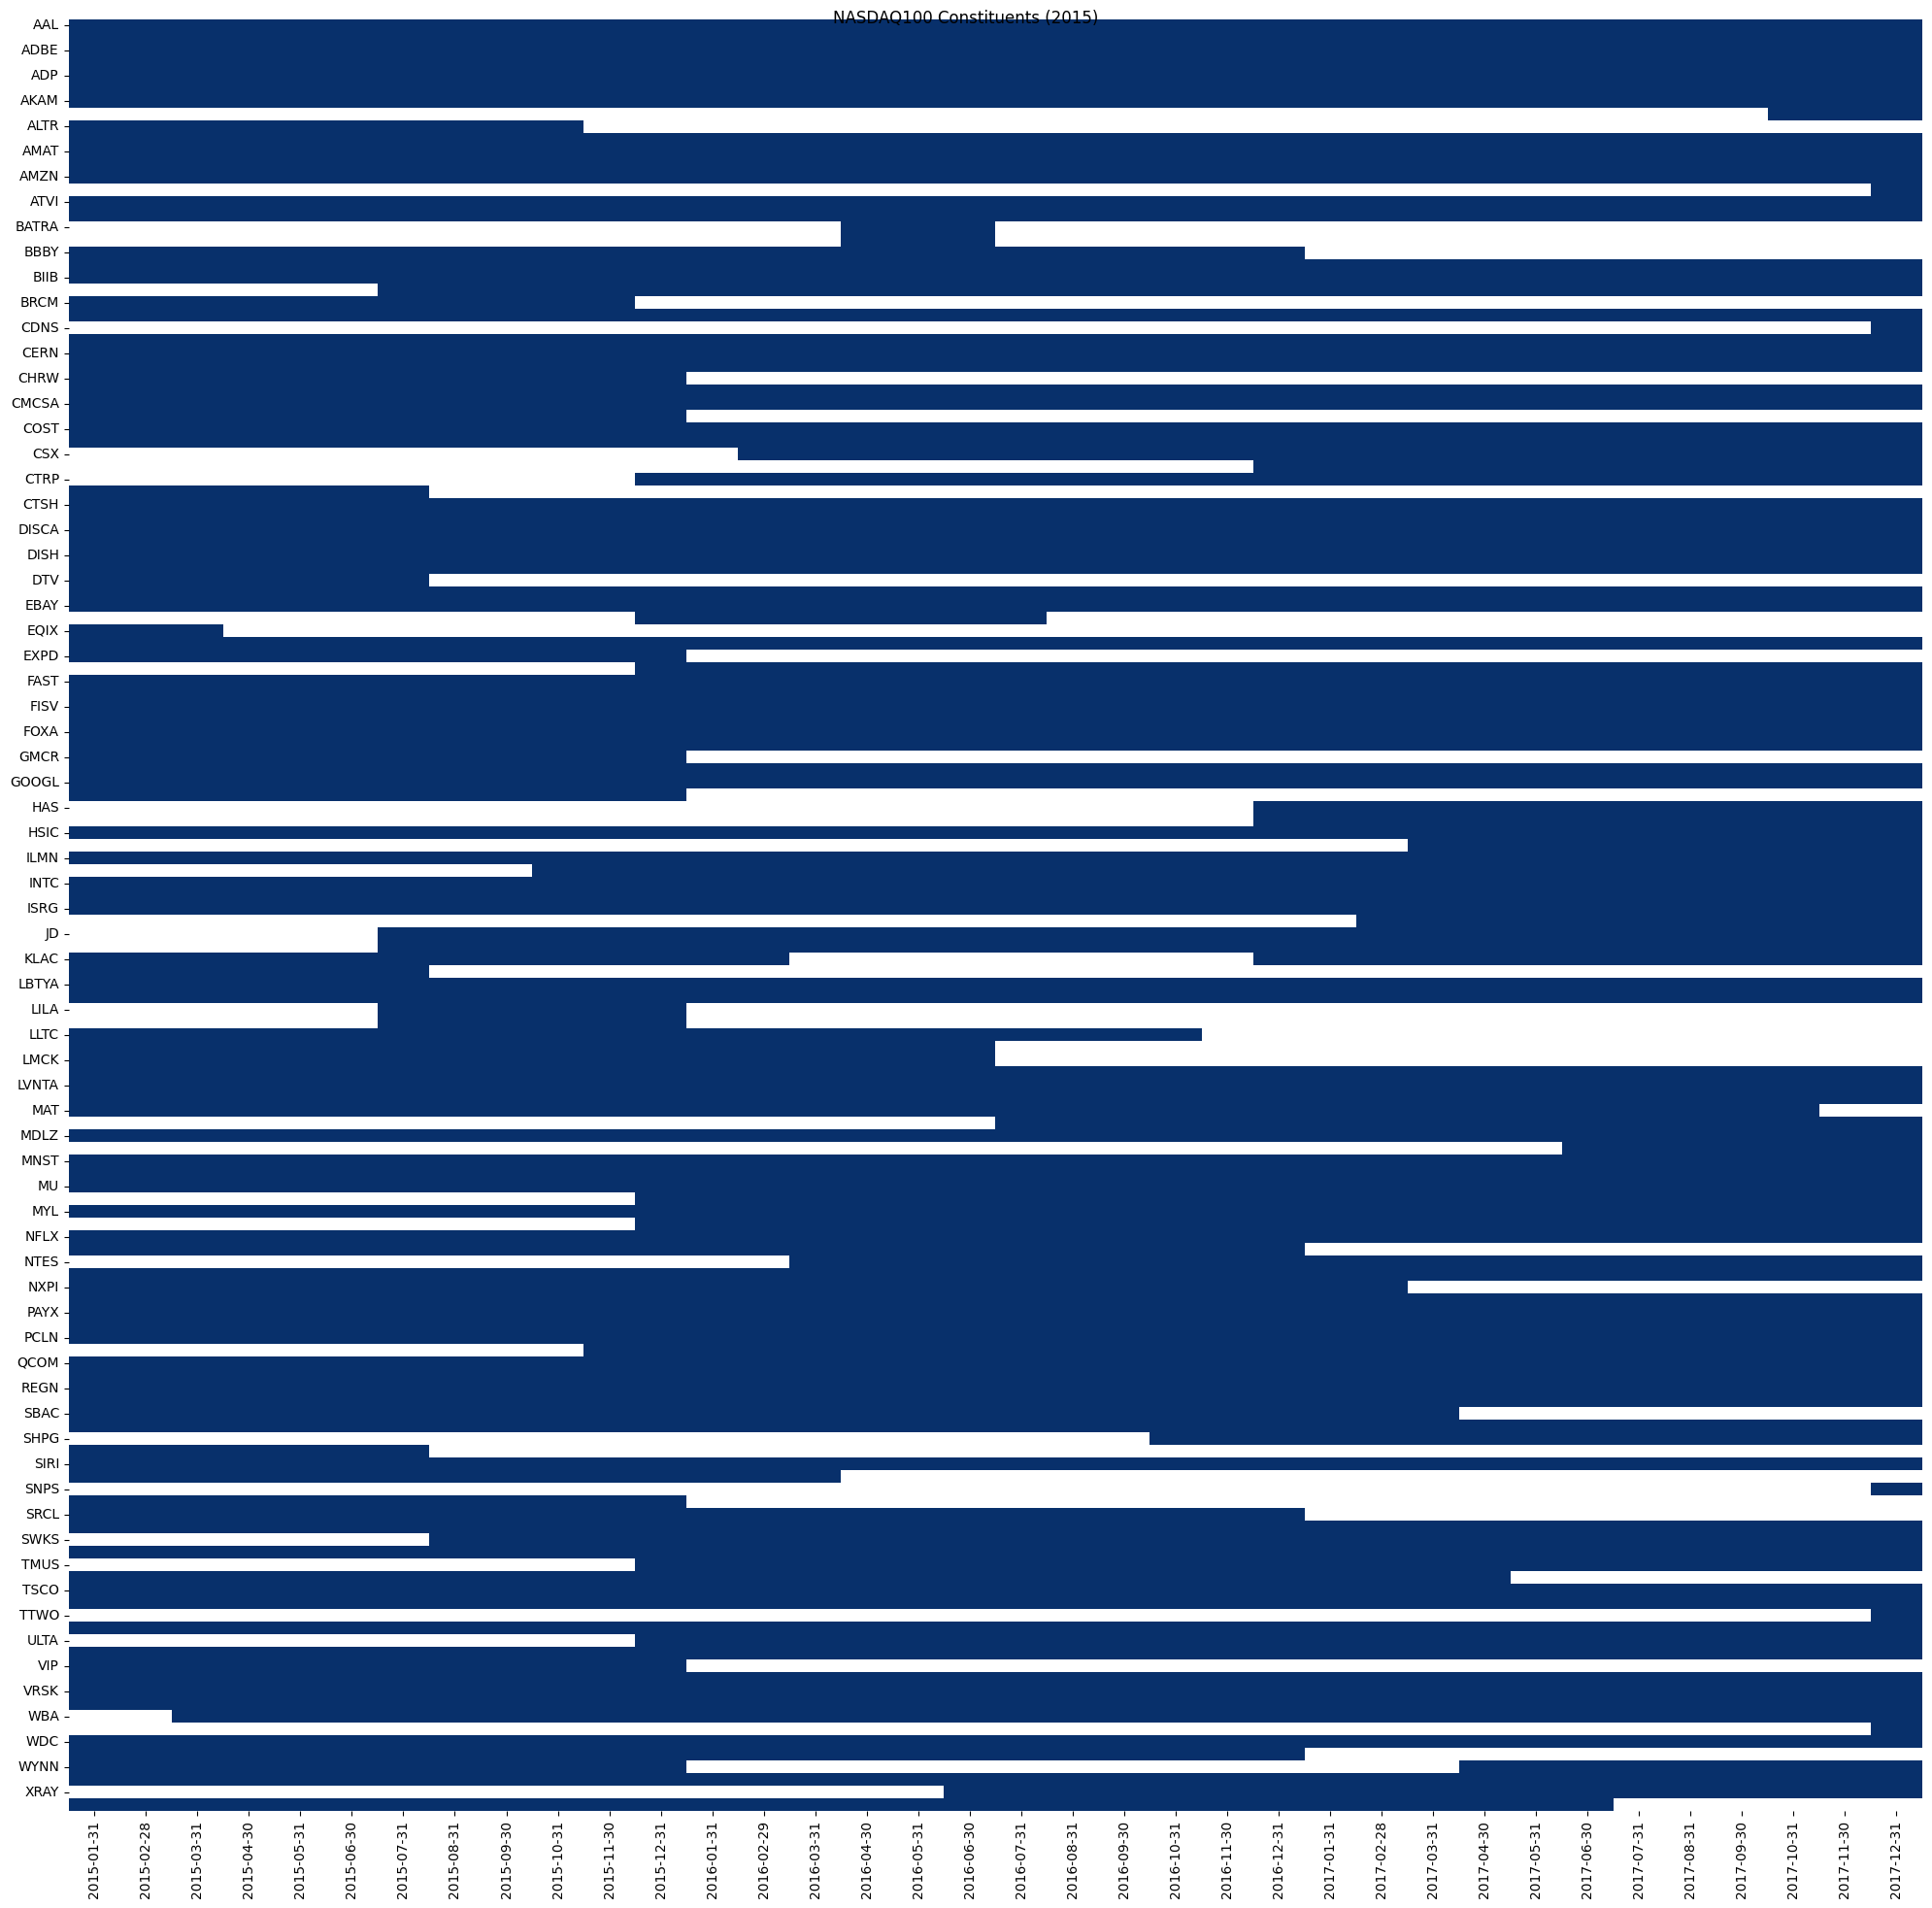

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
mask = constituents.T.isnull()
ax = sns.heatmap(constituents.T, mask=mask, cbar=False, ax=ax, cmap='Blues_r')
ax.set_ylabel('')
fig.suptitle('NASDAQ100 Constituents (2015)')
fig.tight_layout();

In [23]:
constituents.T

,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AAPL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADBE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WYNN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XLNX,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
data.head()

obprice  obsize  oaprice  oasize     first  \
ticker date_time                                                         
GMCR   2015-05-14 09:30:00   102.62   200.0   103.01   100.0  102.6600   
       2015-05-14 09:31:00   102.66   500.0   102.92   200.0  102.6701   
       2015-05-14 09:32:00   103.00   100.0   103.13   400.0  103.0100   
       2015-05-14 09:33:00   102.99   300.0   103.29   100.0  103.0000   
       2015-05-14 09:34:00   103.01   200.0   103.28   200.0  103.0300   

                            firstsize  hbprice  hbsize  haprice  hasize  ...  \
ticker date_time                                                         ...   
GMCR   2015-05-14 09:30:00     8896.0   102.66     100   103.01     100  ...   
       2015-05-14 09:31:00       10.0   103.09     100   103.28     300  ...   
       2015-05-14 09:32:00       63.0   103.00     100   103.30     200  ...   
       2015-05-14 09:33:00      100.0   103.19     100   103.29     100  ...   
       2015-05-14 09:34:00       23.0   103.05     100   103.28     200  ...   

                            fvolume     fprice    up  down   rup  rdown  \
ticker date_time                                                          
GMCR   2015-05-14 09:30:00     3397  102.85395   650  2848   126    589   
       2015-05-14 09:31:00     9365  102.99003  5131  3159  1341   2800   
       2015-05-14 09:32:00      715  103.03313   300   514   400     74   
       2015-05-14 09:33:00     3796  103.18900  3025  1344   450    404   
       2015-05-14 09:34:00     1910  103.05905   919   749   650    850   

                            volweight  volweightrel  timeweightbid  \
ticker date_time                                                     
GMCR   2015-05-14 09:30:00  -13.03753      -0.33894         102.66   
       2015-05-14 09:31:00    4.75147       0.09343         103.00   
       2015-05-14 09:32:00    2.08464       0.02649         102.99   
       2015-05-14 09:33:00   -8.04835      -0.29996         103.01   
       2015-05-14 09:34:00   -3.53816      -0.34602         102.84   

                            timeweightask  
ticker date_time                           
GMCR   2015-05-14 09:30:00         102.92  
       2015-05-14 09:31:00         103.13  
       2015-05-14 09:32:00         103.29  
       2015-05-14 09:33:00         103.28  
       2015-05-14 09:34:00         102.97  

[5 rows x 45 columns]

In [28]:
data[500:600]

obprice  obsize  oaprice  oasize   first  \
ticker date_time                                                       
FISV   2015-05-14 11:19:00    80.43   400.0    80.44   400.0  80.440   
       2015-05-14 11:20:00    80.44   500.0    80.46   200.0  80.460   
       2015-05-14 11:21:00    80.52   300.0    80.53   500.0  80.530   
       2015-05-14 11:22:00    80.53  1200.0    80.55   500.0  80.540   
       2015-05-14 11:23:00    80.53  1600.0    80.55   300.0  80.550   
...                             ...     ...      ...     ...     ...   
       2015-05-14 12:54:00    80.53  1100.0    80.54   100.0  80.540   
       2015-05-14 12:55:00    80.54   600.0    80.56  1000.0  80.560   
       2015-05-14 12:56:00    80.54  1000.0    80.55   300.0  80.545   
       2015-05-14 12:57:00    80.53   900.0    80.54   200.0  80.540   
       2015-05-14 12:58:00    80.51   400.0    80.52   300.0  80.520   

                            firstsize  hbprice  hbsize  haprice  hasize  ...  \
ticker date_time                                                         ...   
FISV   2015-05-14 11:19:00      100.0    80.44     100    80.46     600  ...   
       2015-05-14 11:20:00      100.0    80.52     100    80.53     300  ...   
       2015-05-14 11:21:00       30.0    80.53     100    80.55     800  ...   
       2015-05-14 11:22:00      100.0    80.53    1200    80.55     500  ...   
       2015-05-14 11:23:00        4.0    80.55     100    80.57     400  ...   
...                               ...      ...     ...      ...     ...  ...   
       2015-05-14 12:54:00      100.0    80.55     100    80.56     500  ...   
       2015-05-14 12:55:00      100.0    80.56     100    80.57     400  ...   
       2015-05-14 12:56:00      100.0    80.54    1000    80.57     800  ...   
       2015-05-14 12:57:00      100.0    80.53     900    80.54     200  ...   
       2015-05-14 12:58:00       75.0    80.53     100    80.55     600  ...   

                            fvolume    fprice    up  down   rup  rdown  \
ticker date_time                                                         
FISV   2015-05-14 11:19:00      225  80.45111   225     0   400      0   
       2015-05-14 11:20:00     1502  80.50929   802   570  1680    600   
       2015-05-14 11:21:00      210  80.53480   180     0   430      0   
       2015-05-14 11:22:00      200  80.54000     4     0   200      0   
       2015-05-14 11:23:00        4  80.55000     0     0   204      0   
...                             ...       ...   ...   ...   ...    ...   
       2015-05-14 12:54:00     3300  80.54530   700  1600  1100    200   
       2015-05-14 12:55:00     1387  80.54844   800  1380   619   2006   
       2015-05-14 12:56:00     1400  80.54650  1400  1820   800   3792   
       2015-05-14 12:57:00      100  80.51000   103   490   122   1850   
       2015-05-14 12:58:00      600  80.53000   179   100  1594      0   

                            volweight  volweightrel  timeweightbid  \
ticker date_time                                                     
FISV   2015-05-14 11:19:00   -1.00000      -0.50000          80.44   
       2015-05-14 11:20:00   -0.44419      -0.35814          80.52   
       2015-05-14 11:21:00   -1.00000      -0.50000          80.53   
       2015-05-14 11:22:00    1.00000       0.50000          80.53   
       2015-05-14 11:23:00    0.50000       0.50000          80.55   
...                               ...           ...            ...   
       2015-05-14 12:54:00   -0.16667      -0.16667          80.54   
       2015-05-14 12:55:00    0.45334       0.40945          80.54   
       2015-05-14 12:56:00   -0.19370      -0.13677          80.53   
       2015-05-14 12:57:00    0.07525       0.07525          80.51   
       2015-05-14 12:58:00    0.15475       0.03810          80.53   

                            timeweightask  
ticker date_time                           
FISV   2015-05-14 11:19:00          80.46  
       2015-05-14 11:20:00          80.53  
